In [32]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
from keras.applications.vgg16 import VGG16
base_model=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))


58889256/58889256 [==============================] - 0s 0us/step


In [3]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [4]:
from tensorflow import keras
from keras.layers import Dense,Flatten
from keras.models import Sequential
model=Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


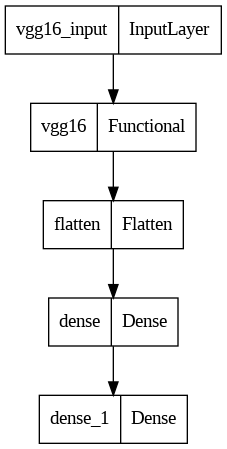

In [6]:
from keras.utils import plot_model
plot_model(model)

In [7]:
base_model.trainable=False

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [10]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [11]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:07<00:00, 259MB/s]
100% 1.06G/1.06G [00:07<00:00, 158MB/s]


In [12]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [13]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [14]:
# Normalize
import tensorflow as tf
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

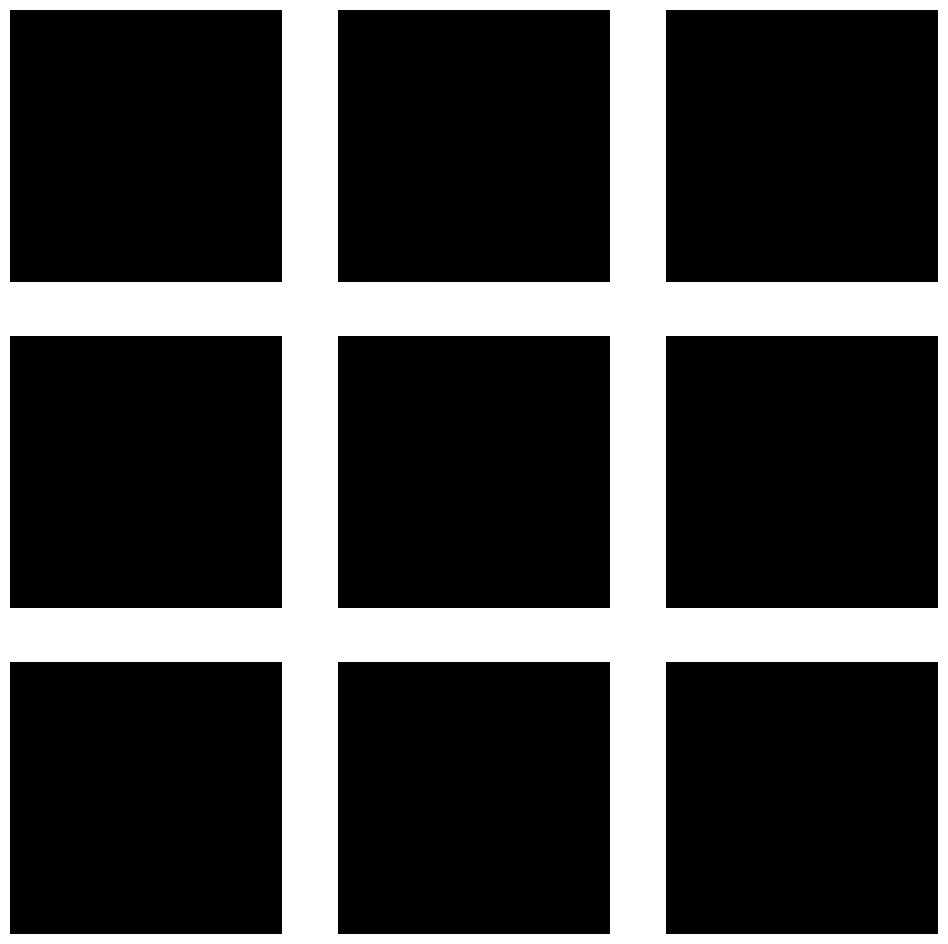

In [15]:
import matplotlib.pyplot as plt
import cv2
# Extract the first batch of images and labels from the training dataset
for images, labels in train_ds.take(1):
    # Display the first 9 images
    plt.figure(figsize=(12, 12))
    for i in range(min(len(images), 9)):
        # Convert the image from tf.Tensor to NumPy array
        img_array = images[i].numpy().astype("uint8")

        # Ensure that the pixel values are in the correct range (0 to 255)
        img_array = cv2.resize(img_array, (150, 150))

        # Check if the image is grayscale and convert to RGB if needed
        if img_array.shape[-1] == 1:
            img_array = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        elif img_array.shape[-1] == 3:
            img_array = cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR)

        # Display the image using plt.imshow()
        plt.subplot(3, 3, i+1)
        plt.imshow(img_array)
        plt.axis('off')

    plt.show()


In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 70s 99ms/step - loss: 0.2681 - accuracy: 0.8863 - val_loss: 0.2349 - val_accuracy: 0.8982
Epoch 2/10
625/625 [==============================] - 64s 101ms/step - loss: 0.1878 - accuracy: 0.9223 - val_loss: 0.2266 - val_accuracy: 0.9030
Epoch 3/10
625/625 [==============================] - 64s 103ms/step - loss: 0.1645 - accuracy: 0.9317 - val_loss: 0.2346 - val_accuracy: 0.9038
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 0.1326 - accuracy: 0.9463 - val_loss: 0.2181 - val_accuracy: 0.9134
Epoch 5/10
625/625 [==============================] - 55s 88ms/step - loss: 0.1110 - accuracy: 0.9570 - val_loss: 0.2331 - val_accuracy: 0.9112
Epoch 6/10
625/625 [==============================] - 55s 87ms/step - loss: 0.0822 - accuracy: 0.9673 - val_loss: 0.2764 - val_accuracy: 0.9050
Epoch 7/10
625/625 [==============================] - 65s 104ms/step - loss: 0.0630 - accuracy: 0.9772 - val_loss: 0.2852 - val_accur

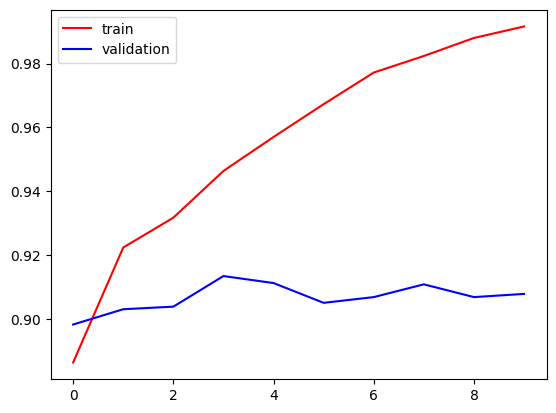

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

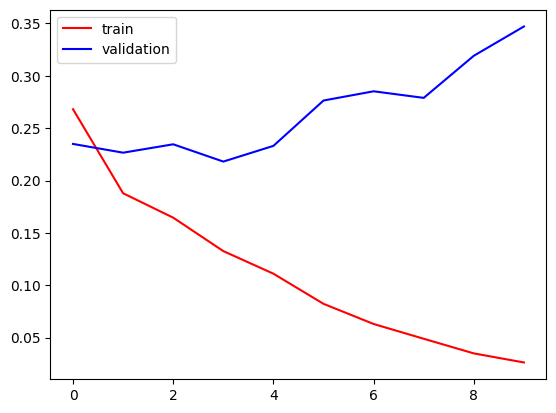

In [19]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [21]:
import cv2
import numpy as np
from tensorflow import keras

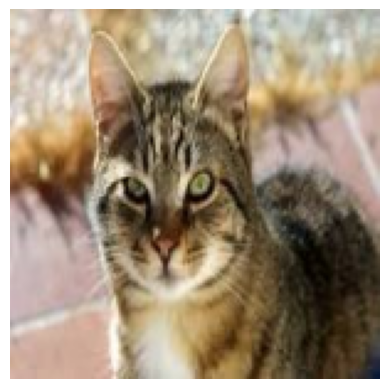

1/1 [==============================] - 0s 19ms/step


In [30]:


# Load the test image
test_image_path = '/content/catty2.jpg'  # Replace with the actual path to your test image
test_image = cv2.imread(test_image_path)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)  # Ensure correct color channels

# Resize the test image to (150, 150)
resized_image = cv2.resize(test_image, (150, 150))

# Display the resized test image
plt.imshow(resized_image)
plt.axis('off')
plt.show()

# Prepare the image for prediction
input_image = np.expand_dims(resized_image, axis=0)

# Make predictions using your trained model
predictions = model.predict(input_image)

# Assuming 'model' is your trained model, and 'predictions' contains the output
# You can then use the predictions as needed for your specific task.


In [31]:
predictions

array([[0.]], dtype=float32)

In [25]:
predictions = model.predict(input_image)

# Get the predicted class (0 or 1)
predicted_class = np.argmax(predictions)

# Define class labels
class_labels = ['cat', 'dog']

# Get the corresponding label for the predicted class
predicted_label = class_labels[predicted_class]

print(f'The predicted class is: {predicted_label}')

1/1 [==============================] - 0s 21ms/step
The predicted class is: cat


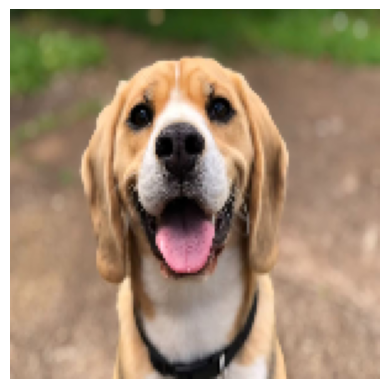

1/1 [==============================] - 0s 22ms/step


In [26]:


# Load the test image
test_image_path = '/content/dog image 1-unsplash.jpg'  # Replace with the actual path to your test image
test_image = cv2.imread(test_image_path)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)  # Ensure correct color channels

# Resize the test image to (150, 150)
resized_image = cv2.resize(test_image, (150, 150))

# Display the resized test image
plt.imshow(resized_image)
plt.axis('off')
plt.show()

# Prepare the image for prediction
input_image = np.expand_dims(resized_image, axis=0)

# Make predictions using your trained model
predictions = model.predict(input_image)

# Assuming 'model' is your trained model, and 'predictions' contains the output
# You can then use the predictions as needed for your specific task.


In [29]:
predictions

array([[1.]], dtype=float32)